# Multilinear Regression, Ridge Regression, and Deep Neural Network Models
### Fletcher Newman, March 2024

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Auto.csv")

1) Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
#Drop all unknown values (only located in horsepower)
df = df.drop(df[df['horsepower'] == '?'].index)
#Change data type from object to int
df[['horsepower']] = df[['horsepower']].apply(pd.to_numeric)

#Drop name column because the tools cannot handle strings
df_clean = df.drop(columns=['name'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


<Axes: >

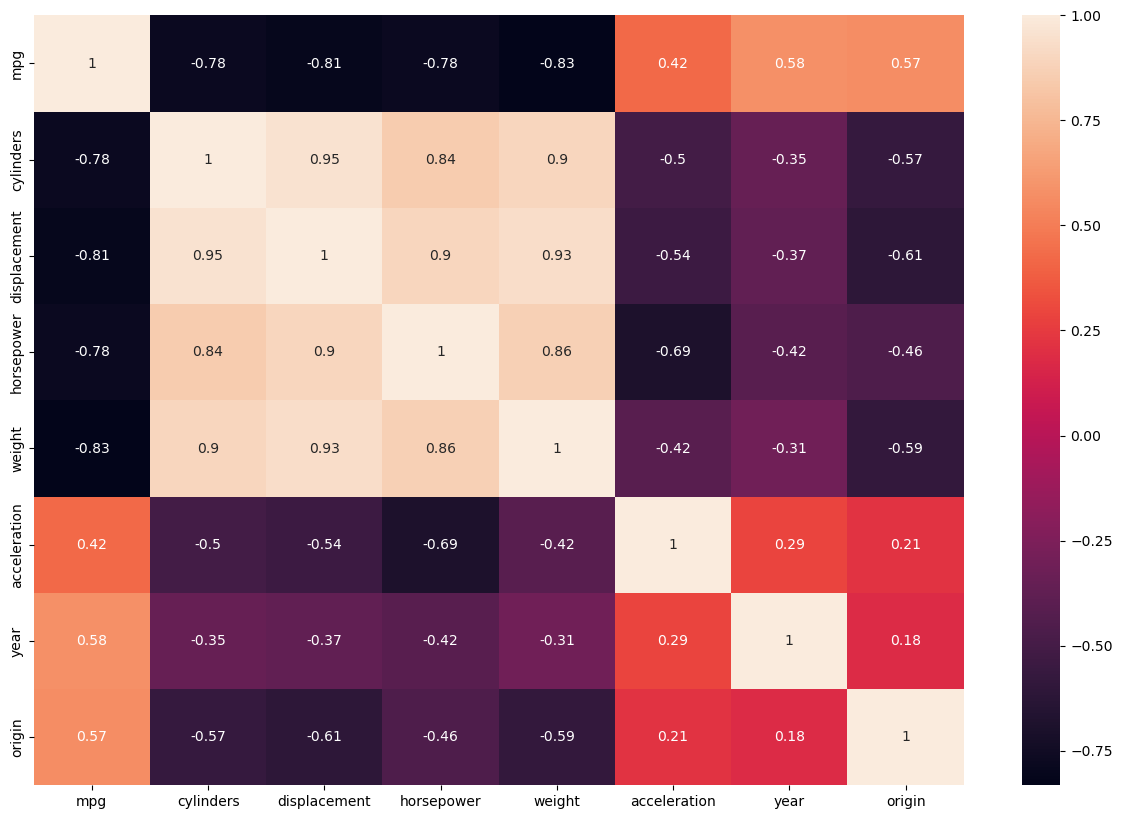

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df_clean.corr(), annot=True)

From this graph, it is gathered that the catigories most correlated with mpg are weight (-0.83), displacement (-0.81), and cylinders (-0.78). 

In [16]:
X = df_clean[['cylinders', "displacement", "weight"]]
y = df_clean[["mpg"]]
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2) Multilinearregression model

In [17]:
from sklearn.linear_model import LinearRegression

In [9]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)

LinearRegression()

3) Ridge Regression Model

In [10]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

4) Deep Neural Network

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow'

Comparing R2 scores

In [ ]:
# Calculating the R2 scores.
y_pred = multi_reg(X_test)
lr_score = r2_score(y_test, y_pred)
y_pred = YOUR_WONDERFUL_NEURAL_NETWORK_MODEL(X_test)
nn_score = r2_score(y_test, y_pred)